# Geolocalización en Barrios de Bucaramanga

## cargar datos

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#zip de imagenes
!unzip -q "/content/drive/MyDrive/IA2/proyecto/street_view_images_bucaramanga (3)-20240621T031233Z-001.zip"

## Organizar datos por celdas
Es necesario para que se trate de un problema de **clasificación** y no **regresión**

In [ ]:
import pandas as pd
#cargar csv con coordenadas
csv_path = "/content/drive/MyDrive/IA2/bucaramanga_dataset (1) (3).csv"
df = pd.read_csv(csv_path)

### Crear división por celdas manualmente

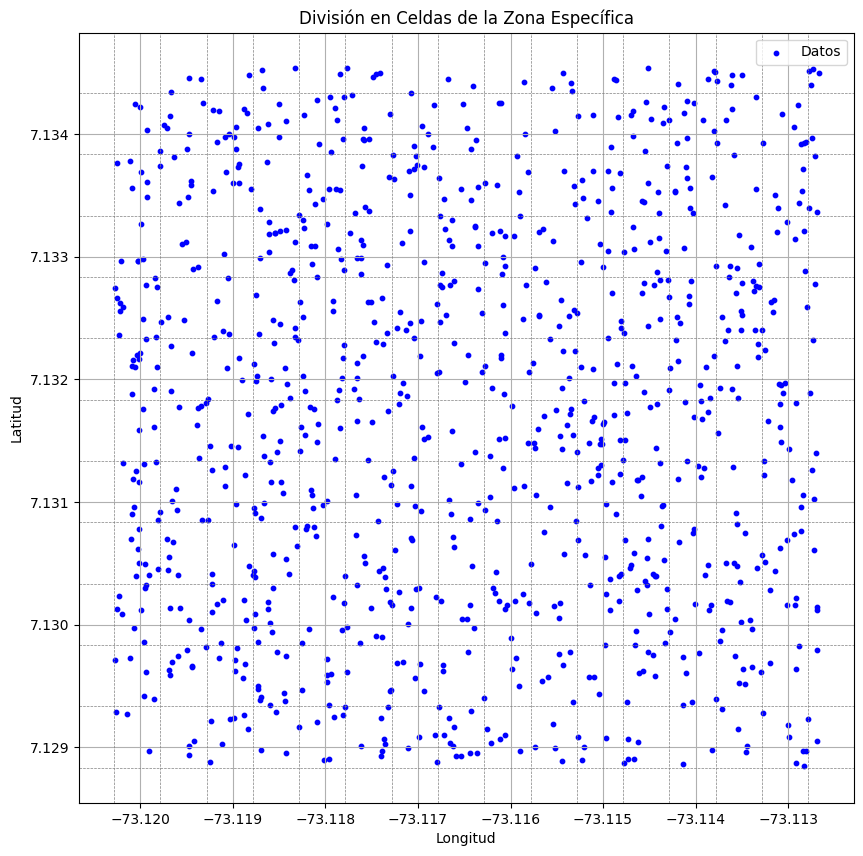

In [ ]:
#@title Crear división de celdas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def create_grid(df, lat_interval, lon_interval):
    #coordenadas con las que se obtuvieron las imagenes
    min_lat, max_lat = 7.128834185597652, 7.1345416972668385
    min_lon, max_lon = -73.12028379395785, -73.11265028199786

    lat_bins = np.arange(min_lat, max_lat, lat_interval)
    lon_bins = np.arange(min_lon, max_lon, lon_interval)

    df['lat_bin'] = pd.cut(df['Latitud'], bins=lat_bins, labels=False)
    df['lon_bin'] = pd.cut(df['Longitud'], bins=lon_bins, labels=False)

    #nombrar cada celda en orden ascendente (1,2,3...)
    total_cells = len(lat_bins) * len(lon_bins)
    df['cell'] = df['lat_bin'] * len(lon_bins) + df['lon_bin']

    return df, lat_bins, lon_bins

# crear celdas con intervalos de 0.0005 grados (ajustar según sea necesario)
df, lat_bins, lon_bins = create_grid(df, lat_interval=0.0005, lon_interval=0.0005)

#guardar csv con las nuevas celdas
df.to_csv("/content/drive/MyDrive/IA2/bucaramanga_dataset_with_cells.csv", index=False)
#visualizar la distribución de imagenes por cada celda
plt.figure(figsize=(10, 10))

#dibujar celdas
for lat in lat_bins:
    plt.axhline(lat, color='gray', linestyle='--', linewidth=0.5)
for lon in lon_bins:
    plt.axvline(lon, color='gray', linestyle='--', linewidth=0.5)

#dibujar los puntos de datos
plt.scatter(df['Longitud'], df['Latitud'], c='blue', s=10, label='Datos')

plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('División en Celdas de la Zona Específica')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#ver el nuevo csv de las imagenes con la celda asignada
print(f"se crearon de {df['cell'].min()} a {df['cell'].max()} celdas")
df.head()

se crearon de 0.0 a 174.0 celdas


Imagen  \
0  street_view_7.132982366522016_-73.119976944860...   
1  street_view_7.129941907761127_-73.114273688978...   
2  street_view_7.130299983929774_-73.118563275181...   
3  street_view_7.132348401073875_-73.119202787515...   
4  street_view_7.131490483963106_-73.118087362847...   

                                           Dirección   Latitud   Longitud  \
0  infantil Park, Cra. 27 #16-2 a 16-40, Bucarama...  7.132982 -73.119977   
1  Av. Quebrada Seca #33-14, Bucaramanga, Santand...  7.129942 -73.114274   
2   Cra. 28 #19-53, Bucaramanga, Santander, Colombia  7.130300 -73.118563   
3   Cra. 28 #16-74, Bucaramanga, Santander, Colombia  7.132348 -73.119203   
4    Cra 29 #18-13, Bucaramanga, Santander, Colombia  7.131490 -73.118087   

   lat_bin  lon_bin   cell  
0      8.0      0.0  128.0  
1      2.0     12.0   44.0  
2      2.0      3.0   35.0  
3      7.0      2.0  114.0  
4      5.0      4.0   84.0

In [ ]:
#hubo imagenes que no se les asignó celda por lo que se encuentran en la mitad
df['cell'][df['cell'] % 1 != 0]

76    NaN
77    NaN
110   NaN
152   NaN
154   NaN
155   NaN
175   NaN
177   NaN
194   NaN
211   NaN
228   NaN
257   NaN
268   NaN
269   NaN
299   NaN
314   NaN
335   NaN
340   NaN
347   NaN
387   NaN
499   NaN
532   NaN
536   NaN
538   NaN
556   NaN
563   NaN
565   NaN
609   NaN
644   NaN
677   NaN
686   NaN
713   NaN
730   NaN
743   NaN
758   NaN
779   NaN
793   NaN
798   NaN
822   NaN
838   NaN
846   NaN
851   NaN
857   NaN
871   NaN
958   NaN
960   NaN
978   NaN
986   NaN
995   NaN
Name: cell, dtype: float64

In [ ]:
#@title Visualizar celdas en el mapa

import folium
import pandas as pd
import numpy as np

#coordenadas
lat_min, lat_max = 7.128834185597652, 7.1345416972668385
lon_min, lon_max = -73.12028379395785, -73.11265028199786

#tamaño de las celdas
lat_interval = 0.0005
lon_interval = 0.0005

#dataframe de celdas
lat_bins = np.arange(lat_min, lat_max, lat_interval)
lon_bins = np.arange(lon_min, lon_max, lon_interval)
cells = []

for i in range(len(lat_bins) - 1):
    for j in range(len(lon_bins) - 1):
        cells.append({
            'lat_min': lat_bins[i],
            'lat_max': lat_bins[i + 1],
            'lon_min': lon_bins[j],
            'lon_max': lon_bins[j + 1]
        })

cells_df = pd.DataFrame(cells)

# mapa de bucaramanga
m = folium.Map(location=[(lat_min + lat_max) / 2, (lon_min + lon_max) / 2], zoom_start=15)

for idx, row in cells_df.iterrows():
    bounds = [
        [row['lat_min'], row['lon_min']],
        [row['lat_min'], row['lon_max']],
        [row['lat_max'], row['lon_max']],
        [row['lat_max'], row['lon_min']],
        [row['lat_min'], row['lon_min']]
    ]
    folium.PolyLine(bounds, color="blue", weight=2.5, opacity=0.8).add_to(m)


m.save("bucaramanga_grid_map.html")
m


### Haciéndolo con H3, que tiene celdas predefinidas

In [ ]:
import h3

#se le asigna una celda h3 a cada registro del dataframe
def assign_h3_cell(row, resolution):
    lat = row['Latitud']
    lon = row['Longitud']
    h3_cell = h3.geo_to_h3(lat, lon, resolution)
    return h3_cell

#resolucion de celdas
#el nivel 0 tiene la mayor área y el nivel 15 tiene la menor área
resolution = 10

df['H3_cell'] = df.apply(lambda row: assign_h3_cell(row, resolution), axis=1)
print(df.head()) #cada imagen ahora tiene una celda h3 asignada


                                              Imagen  \
0  street_view_7.132982366522016_-73.119976944860...   
1  street_view_7.129941907761127_-73.114273688978...   
2  street_view_7.130299983929774_-73.118563275181...   
3  street_view_7.132348401073875_-73.119202787515...   
4  street_view_7.131490483963106_-73.118087362847...   

                                           Dirección   Latitud   Longitud  \
0  infantil Park, Cra. 27 #16-2 a 16-40, Bucarama...  7.132982 -73.119977   
1  Av. Quebrada Seca #33-14, Bucaramanga, Santand...  7.129942 -73.114274   
2   Cra. 28 #19-53, Bucaramanga, Santander, Colombia  7.130300 -73.118563   
3   Cra. 28 #16-74, Bucaramanga, Santander, Colombia  7.132348 -73.119203   
4    Cra 29 #18-13, Bucaramanga, Santander, Colombia  7.131490 -73.118087   

   lat_bin  lon_bin   cell          H3_cell  
0      8.0      0.0  128.0  8a66089b045ffff  
1      2.0     12.0   44.0  8a66089b0747fff  
2      2.0      3.0   35.0  8a66089b07affff  
3      7.0      

In [ ]:

from shapely.geometry import Polygon
import geopandas as gpd

def cell_to_shapely(cell):
    coords = h3.h3_to_geo_boundary(cell)
    flipped = tuple(coord[::-1] for coord in coords)
    return Polygon(flipped)


#poligonos shapely se crean para cada celda única del dataset
h3_geoms = df['H3_cell'].apply(lambda x: cell_to_shapely(x))

#GeoDataFrame con los polígonos y la columna 'H3_cell'
h3_gdf = gpd.GeoDataFrame(data=df, geometry=h3_geoms, crs='EPSG:4326')

h3_gdf.head()

Imagen  \
0  street_view_7.132982366522016_-73.119976944860...   
1  street_view_7.129941907761127_-73.114273688978...   
2  street_view_7.130299983929774_-73.118563275181...   
3  street_view_7.132348401073875_-73.119202787515...   
4  street_view_7.131490483963106_-73.118087362847...   

                                           Dirección   Latitud   Longitud  \
0  infantil Park, Cra. 27 #16-2 a 16-40, Bucarama...  7.132982 -73.119977   
1  Av. Quebrada Seca #33-14, Bucaramanga, Santand...  7.129942 -73.114274   
2   Cra. 28 #19-53, Bucaramanga, Santander, Colombia  7.130300 -73.118563   
3   Cra. 28 #16-74, Bucaramanga, Santander, Colombia  7.132348 -73.119203   
4    Cra 29 #18-13, Bucaramanga, Santander, Colombia  7.131490 -73.118087   

           H3_cell                                           geometry  
0  8a66089b045ffff  POLYGON ((-73.1203 7.13315, -73.12087 7.13279,...  
1  8a66089b0747fff  POLYGON ((-73.11455 7.13038, -73.11511 7.13002...  
2  8a66089b07affff  POLYGON ((-73.11887 7.13119, -73.11944 7.13082...  
3  8a66089b044ffff  POLYGON ((-73.1191 7.13321, -73.11966 7.13285,...  
4  8a66089b0717fff  POLYGON ((-73.11838 7.13223, -73.11895 7.13186...

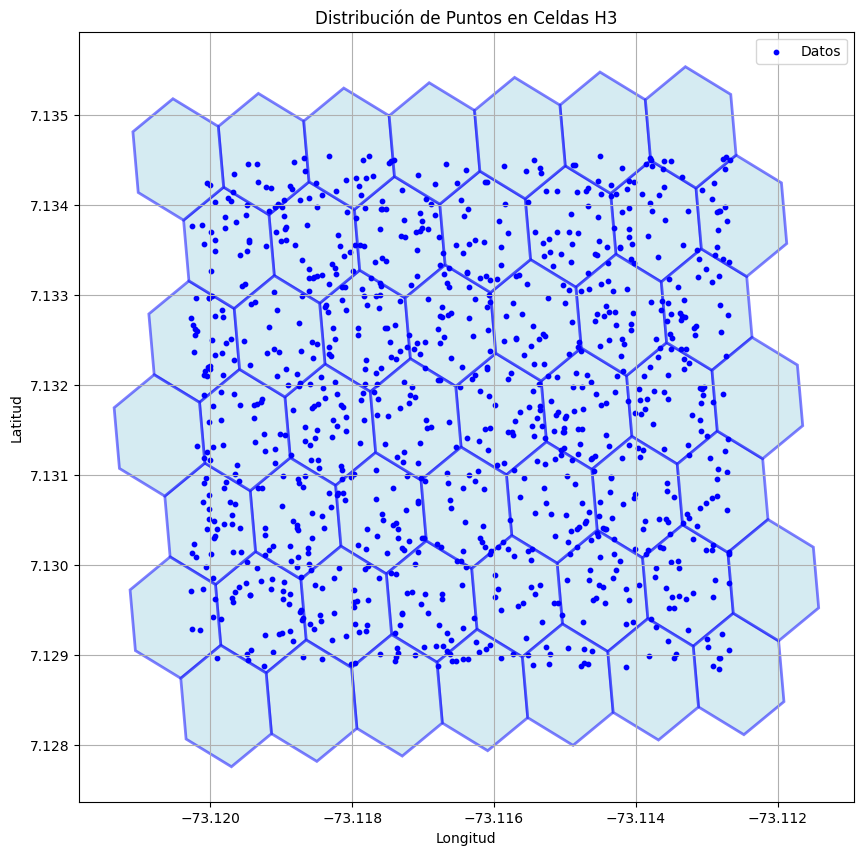

In [ ]:
#@title visualizar puntos en cada celda
import matplotlib.pyplot as plt
import pandas as pd
import h3
cell_counts = h3_gdf['H3_cell'].value_counts()
plt.figure(figsize=(10, 10))

#dibujar celdas
for h3_cell in cell_counts.index:
    coords = h3.h3_to_geo_boundary(h3_cell)
    latitudes = [coord[0] for coord in coords]
    longitudes = [coord[1] for coord in coords]
    plt.fill(longitudes, latitudes, color='lightblue', alpha=0.5, edgecolor='blue', linewidth=2)


plt.scatter(h3_gdf['Longitud'], h3_gdf['Latitud'], c='blue', s=10, label='Datos')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Distribución de Puntos en Celdas H3')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#@title visualizar puntos en mapa de bucaramanga
import folium

#mapa centrado en las coordenadas promedio del GeoDataFrame
m = folium.Map(location=[h3_gdf['geometry'].centroid.y.mean(), h3_gdf['geometry'].centroid.x.mean()], zoom_start=12)

#añadir cada poligono del gdf al mapa como un GeoJSON
for idx, row in h3_gdf.iterrows():
    geojson = row['geometry'].__geo_interface__
    folium.GeoJson(geojson).add_to(m)
m #el color entre mas fuerte significa mayor cantidad de fotos tomadas ahí de nuestro dataset

<ipython-input-25-82a7f8b4fecc>:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  m = folium.Map(location=[h3_gdf['geometry'].centroid.y.mean(), h3_gdf['geometry'].centroid.x.mean()], zoom_start=12)


In [15]:
#@title función para visualizar una celda específica, para facilitar a la hora de evaluar el rendimiento del modelo

import folium
import h3
def cell_to_map(h3_cell1, h3_cell2):
    coords1 = h3.h3_to_geo_boundary(h3_cell1)
    coords2 = h3.h3_to_geo_boundary(h3_cell2)

    centroid_lat = sum(coord[0] for coord in coords1) / len(coords1)
    centroid_lon = sum(coord[1] for coord in coords1) / len(coords1)

    #mapa Folium centrado en el centroide del primer polígono
    m = folium.Map(location=[centroid_lat, centroid_lon], zoom_start=12)
    #blue primeras
    folium.Polygon(locations=coords1, color='blue', weight=3, fill=True, fill_color='lightblue', fill_opacity=0.5).add_to(m)
    #red segundas
    folium.Polygon(locations=coords2, color='red', weight=3, fill=True, fill_color='lightcoral', fill_opacity=0.5).add_to(m)

    return m

### Pre procesamiento datos
Se van a usar otras columnas como latitud, longitud, etc, para probar si mejora el modelo. Por ello, se borrará dirección y trabajará con cosas como la carrera, calle, número, etc divididas

In [ ]:
import re

#patrones para extraer los valores de la dirección
pattern_cra = r'Cra\.?\s*(\d+\w*)'
pattern_cl = r'Cl\.?\s*(\d+\w*)'
pattern_numero = r'#(\d+\w*)(?:\s*-\s*(\d+))?'

df['Cra'] = df['Dirección'].str.extract(pattern_cra, flags=re.IGNORECASE, expand=False)
df['Cl'] = df['Dirección'].str.extract(pattern_cl, flags=re.IGNORECASE, expand=False)
df[['Número', 'con']] = df['Dirección'].str.extract(pattern_numero, expand=True)

df.drop('Dirección', inplace=True,axis=1)
df = df.fillna(0)


In [ ]:
#dataframe resultante con direcciones ajustadas
df.head()

Imagen   Latitud   Longitud  \
0  street_view_7.132982366522016_-73.119976944860...  7.132982 -73.119977   
1  street_view_7.129941907761127_-73.114273688978...  7.129942 -73.114274   
2  street_view_7.130299983929774_-73.118563275181...  7.130300 -73.118563   
3  street_view_7.132348401073875_-73.119202787515...  7.132348 -73.119203   
4  street_view_7.131490483963106_-73.118087362847...  7.131490 -73.118087   

           H3_cell Cra Cl Número con  
0  8a66089b045ffff  27  0     16   2  
1  8a66089b0747fff   0  0     33  14  
2  8a66089b07affff  28  0     19  53  
3  8a66089b044ffff  28  0     16  74  
4  8a66089b0717fff  29  0     18  13

In [ ]:
def remove_letters_and_convert(column):
    return column.str.extract('(\d+)')

df['Cra'] = remove_letters_and_convert(df['Cra'])
df['Cl'] = remove_letters_and_convert(df['Cl'])
df['Número'] = remove_letters_and_convert(df['Número'])
df['con'] = remove_letters_and_convert(df['con'])
df = df.fillna(0)

In [ ]:
df['Cra']=df['Cra'].astype(int)
df['Cl']=df['Cl'].astype(int)
df['Número']=df['Número'].astype(int)
df['con']=df['con'].astype(int)

In [ ]:
h3_unique = df['H3_cell'].unique()
label_map = {h3: idx for idx, h3 in enumerate(h3_unique)}

df['LABEL'] = df['H3_cell'].map(label_map)
df.to_csv('bucaramanga_final_df.csv', index=False)
#df=df.drop("cell", axis=1)

In [ ]:
df.head()

Imagen   Latitud   Longitud  \
0  street_view_7.132982366522016_-73.119976944860...  7.132982 -73.119977   
1  street_view_7.129941907761127_-73.114273688978...  7.129942 -73.114274   
2  street_view_7.130299983929774_-73.118563275181...  7.130300 -73.118563   
3  street_view_7.132348401073875_-73.119202787515...  7.132348 -73.119203   
4  street_view_7.131490483963106_-73.118087362847...  7.131490 -73.118087   

           H3_cell  Cra  Cl  Número  con  LABEL  
0  8a66089b045ffff   27   0      16    2      0  
1  8a66089b0747fff    0   0      33   14      1  
2  8a66089b07affff   28   0      19   53      2  
3  8a66089b044ffff   28   0      16   74      3  
4  8a66089b0717fff   29   0      18   13      4

In [ ]:
#@title preprocesamiento imagenes y columnas extras
import os
import numpy as np
import pandas as pd
import zipfile
from PIL import Image
from sklearn.model_selection import train_test_split

# Función para cargar características y etiquetas desde el DataFrame
def load_features(df):
    other_features = []
    labels = []

    for index, row in df.iterrows():
        # Aquí se asume que 'Imagen' es una columna que contiene las rutas de las imágenes
        # Puedes ajustar esto según la estructura real de tu DataFrame
        other_features.append([row[col] for col in df.columns if col != 'Imagen' and col != 'LABEL' and col != 'H3_cell'])
        labels.append(row['LABEL'])

    return np.array(other_features), np.array(labels)

# Directorio donde están las imágenes
images_dir = '/content/street_view_images_bucaramanga (3)/'

# Cargar imágenes y guardarlas como arrays numpy
image_arrays = []
for filename in os.listdir(images_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(images_dir, filename)
        img = Image.open(image_path)
        img_array = np.asarray(img)
        image_arrays.append(img_array)

image_arrays = np.array(image_arrays)
np.save('/content/all_images.npy', image_arrays)

#load las features
other_features, labels = load_features(df)

#train, validation y test sets
train_img, test_img, train_other, test_other, train_y, test_y = \
    train_test_split(image_arrays, other_features, labels, test_size=0.2, random_state=42)

train_img, val_img, train_other, val_other, train_y, val_y = \
    train_test_split(train_img, train_other, train_y, test_size=0.25, random_state=42)


data = {
    'train_img': train_img,
    'val_img': val_img,
    'test_img': test_img,
    'train_other': train_other,
    'val_other': val_other,
    'test_other': test_other,
    'train_y': train_y,
    'val_y': val_y,
    'test_y': test_y
}

zip_filename = '/content/datos.zip'

with zipfile.ZipFile(zip_filename, 'w') as zipf:
    for key, value in data.items():
        np.save(f'/content/{key}.npy', value)
        zipf.write(f'/content/{key}.npy', f'{key}.npy')

print(f'Datos guardados en {zip_filename}')


Datos guardados en /content/datos.zip


In [ ]:

#dimensiones de los datos
print("Dimensiones de los conjuntos:")
print("Train imágenes:", len(train_img))
print("Val imágenes:", len(val_img))
print("Test imágenes:", len(test_img))
print("Train características:", train_other.shape)
print("Val características:", val_other.shape)
print("Test características:", test_other.shape)
print("Train etiquetas:", train_y.shape)
print("Val etiquetas:", val_y.shape)
print("Test etiquetas:", test_y.shape)

Dimensiones de los conjuntos:
Train imágenes: 598
Val imágenes: 200
Test imágenes: 200
Train características: (598, 6)
Val características: (200, 6)
Test características: (200, 6)
Train etiquetas: (598,)
Val etiquetas: (200,)
Test etiquetas: (200,)


## ENTRENAMIENTO MODELO


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/IA2/proyecto/DF_MODIFIED_BUCARAMANGA (4).csv')

In [3]:
import numpy as np

!unzip -q "/content/drive/MyDrive/IA2/proyecto/datos.zip"
#cargar datos
train_img = np.load('/content/train_img.npy')
val_img = np.load('/content/val_img.npy')
test_img = np.load('/content/test_img.npy')

#train_other = np.load('/content/train_other.npy')
#val_other = np.load('/content/val_other.npy')
#test_other = np.load('/content/test_other.npy')

train_y = np.load('/content/train_y.npy')
val_y = np.load('/content/val_y.npy')
test_y = np.load('/content/test_y.npy')

In [ ]:
#Data a usar
    # 'train_img': train_img,
    # 'val_img': val_img,
    # 'test_img': test_img,
    # 'train_other': train_other,
    # 'val_other': val_other,
    # 'test_other': test_other,
    # 'train_y': train_y,
    # 'val_y': val_y,
    # 'test_y': test_y

In [ ]:
import glob
import pandas as pd
import numpy as np
from PIL import Image
import glob

img_width, img_height= 640, 640
batch_size = 32
batch_shape = [batch_size, img_height, img_width, 3]
print(f'batch_shape: {batch_shape}')
num_classes = len(np.unique(df['LABEL']))
print(f'Número de clases: {num_classes}')
images_path = "/content/street_view_images_bucaramanga (3)/*"
image_files = glob.glob(images_path)
print(f'Número de imágenes encontradas: {len(image_files)}')

batch_shape: [32, 640, 640, 3]
Número de clases: 51
Número de imágenes encontradas: 998


### Inception pre entrenado
Se trabajó con con un modelo Inception básico pre entrenado, similar al usado en [PlaNet](https://arxiv.org/pdf/1602.05314); esto para aumentar la eficiencia y obtener mejores resultados

In [ ]:
#@title MEJOR MODELO
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models

inception_v3=InceptionV3(input_shape=(640,640,3), include_top=False, weights='imagenet')


#freezear capas del modelo base (no se actualizan sus pesos)
for layer in inception_v3.layers:
    layer.trainable = False

#nuevas capas
#flatten
x = layers.GlobalAveragePooling2D()(inception_v3.output)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x) #freezear capas puede tender a overfitting
predictions = layers.Dense(51, activation='softmax')(x) #capa softmax para clasificar


model_1 = models.Model(inputs=inception_v3.input, outputs=predictions)
model_1.summary()

87910968/87910968 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 640, 640, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 319, 319, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 319, 319, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     

In [ ]:
#@title training con inceptionv3
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau


optimizer = Adam(learning_rate=0.001)

model_1.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=8, min_lr=0.0001)
callbacks = [reduce_lr]


epochs = 250
callbacks = [
    EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True),
    ModelCheckpoint('/content/best_inception.h5', monitor='val_loss', save_best_only=True)
]

history = model_1.fit(train_img, train_y,
                      epochs=epochs,
                      batch_size=32,
                      validation_data=(val_img, val_y),
                      callbacks=callbacks)

loss, accuracy = model_1.evaluate(val_img, val_y)
print(f"Loss: {loss}, Accuracy: {accuracy}")

Epoch 1/250
19/19 [==============================] - ETA: 0s - loss: 3.7398 - accuracy: 0.0435

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


19/19 [==============================] - 21s 839ms/step - loss: 3.7398 - accuracy: 0.0435 - val_loss: 3.7506 - val_accuracy: 0.0300
Epoch 2/250
19/19 [==============================] - 16s 840ms/step - loss: 3.7393 - accuracy: 0.0435 - val_loss: 3.7502 - val_accuracy: 0.0300
Epoch 3/250
19/19 [==============================] - 13s 715ms/step - loss: 3.7391 - accuracy: 0.0435 - val_loss: 3.7500 - val_accuracy: 0.0300
Epoch 4/250
19/19 [==============================] - 15s 823ms/step - loss: 3.7388 - accuracy: 0.0435 - val_loss: 3.7498 - val_accuracy: 0.0300
Epoch 5/250
19/19 [==============================] - 15s 820ms/step - loss: 3.7386 - accuracy: 0.0435 - val_loss: 3.7498 - val_accuracy: 0.0300
Epoch 6/250
19/19 [==============================] - 13s 704ms/step - loss: 3.7384 - accuracy: 0.0435 - val_loss: 3.7494 - val_accuracy: 0.0300
Epoch 7/250
19/19 [==============================] - 13s 715ms/step - loss: 3.7382 - accuracy: 0.0435 - val_loss: 3.7491 - val_accuracy: 0.0300
Epoc

In [19]:
#@title plotear training vs validation
def plot(history):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.title('Learning curve')
    plt.xlabel('Epochs')
    plt.ylabel('log_loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    train_metric = 'accuracy'
    val_metric = 'val_accuracy'
    plt.plot(history.history[train_metric], label='Training')
    plt.plot(history.history[val_metric], label='Validation')
    plt.title('accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.legend()

    plt.show()

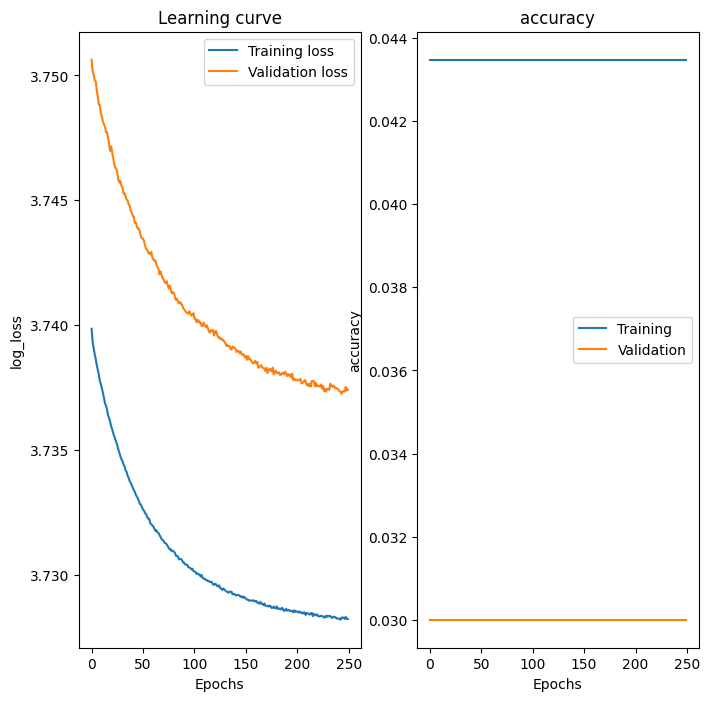

In [ ]:
plot(history)

In [4]:
#@title Función para aplicar Grad-CAM
def grad_cam(model, img_path, layer_name, target_size=(640,640)):
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0

    # Obtener el tensor de salida y las capas de interés
    grad_model = Model(
        [model.inputs],
        [model.get_layer(layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_output, predictions = grad_model(img_array)
        class_idx = np.argmax(predictions[0])
        loss = predictions[:, class_idx]

    # Calcular gradientes
    output = conv_output[0]
    grads = tape.gradient(loss, conv_output)[0]

    # Obtener pesos globales
    weights = tf.reduce_mean(grads, axis=(0, 1))

    # Construir mapa de calor ponderado
    cam = np.ones(output.shape[0: 2], dtype=np.float32)
    for i, w in enumerate(weights):
        cam += w * output[:, :, i]

    # Normalizar y escalar mapa de calor
    cam = cv2.resize(cam.numpy(), (224, 224))
    cam = np.maximum(cam, 0)
    heatmap = (cam - cam.min()) / (cam.max() - cam.min())

    # Aplicar mapa de calor sobre la imagen original
    img = cv2.imread(img_path)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

    return img, superimposed_img

1/1 [==============================] - 0s 49ms/step
Clase predicha: 6
Confianza: 0.0448
Clase verdadera: 101    20
Name: LABEL, dtype: int64


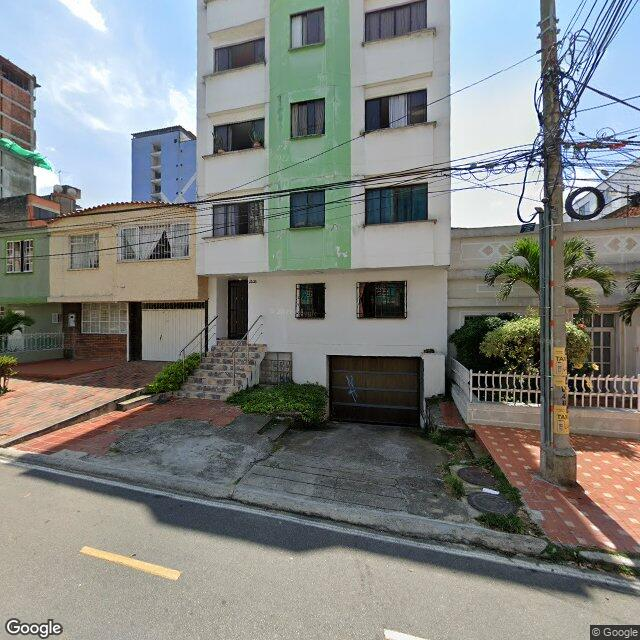

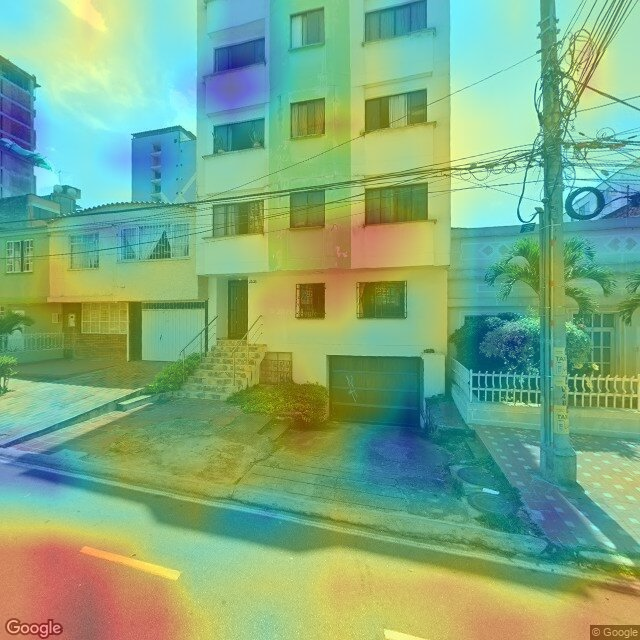

In [ ]:
#@title Grad-CAM para evaluar en dónde se fija el modelo
from google.colab.patches import cv2_imshow
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image

# Ruta de la imagen para probar Grad-CAM
img_path = "/content/street_view_images_bucaramanga (3)/street_view_7.128899300474004_-73.11801907514351.jpg"
#capa convolucional
layer_name = "conv2d_85"

# Cargar la imagen y preprocesarla para la entrada del modelo
img = image.load_img(img_path, target_size=(640, 640))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Realizar la predicción
predictions = model_1.predict(img_array)

# Decodificar las predicciones (asumiendo que son probabilidades)
predicted_class = np.argmax(predictions[0])
confidence = predictions[0][predicted_class]
resultado = df[df['Imagen'] == "street_view_7.128899300474004_-73.11801907514351.jpg"]

# Obtener la clase predicha y su confianza
print(f"Clase predicha: {predicted_class}")
print(f"Confianza: {confidence:.4f}")
print(f"Clase verdadera: {resultado['LABEL']}")

#imagenes og y superpuestas
original_img, gradcam_img = grad_cam(model_1, img_path, layer_name)
cv2_imshow(original_img)
cv2_imshow(gradcam_img)

In [ ]:
#@title ubicación en el mapa
real=resultado["H3_cell"].to_string(index=False)
#a =df[df['LABEL'] == 28]["H3_cell"]
pred="8a66089b078ffff"
cell_to_map(real, pred) #primeras blue segundas red

### Inception V3 + OTRAS COLUMNAS
como se dijo antes, las demás columnas como dirección etc se recopilaron en un array numpy. Se intentará probar si mejora el modelo con estas


In [ ]:
#@title modelo
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models, Input
from tensorflow.keras.models import Model

num_features = train_other.shape[1]  # Número de características adicionales

inception_v3 = InceptionV3(input_shape=(640, 640, 3), include_top=False, weights='imagenet')
for layer in inception_v3.layers:
    layer.trainable = False

image_input = inception_v3.input
x = layers.GlobalAveragePooling2D()(inception_v3.output)
x = layers.Dense(128, activation='relu')(x) #más neuronas
x = layers.Dropout(0.2)(x)

#procesar las columnas extras
features_input = Input(shape=(num_features,))
y = layers.Dense(64, activation='relu')(features_input)
y = layers.Dropout(0.2)(y)

#combinar entradas
combined = layers.concatenate([x, y])
combined = layers.Dense(32, activation='relu')(combined)
predictions = layers.Dense(num_classes, activation='softmax')(combined)


model2 = Model(inputs=[image_input, features_input], outputs=predictions)
model2.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 640, 640, 3)]        0         []                            
                                                                                                  
 conv2d_188 (Conv2D)         (None, 319, 319, 32)         864       ['input_5[0][0]']             
                                                                                                  
 batch_normalization_188 (B  (None, 319, 319, 32)         96        ['conv2d_188[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_188 (Activation  (None, 319, 319, 32)         0         ['batch_normalization_18

In [ ]:
#@title training
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, CSVLogger
# Callbacks
checkpoint = ModelCheckpoint('incep_mod.h5', monitor='val_loss', save_best_only=True, mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(
    [train_img, train_other], train_y,
    epochs=100,
    batch_size=32,
    validation_data=([val_img, val_other], val_y),
    callbacks=[checkpoint, reduce_lr, early_stopping]
)

Epoch 1/100
19/19 [==============================] - ETA: 0s - loss: 115.4855 - accuracy: 0.0167

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


19/19 [==============================] - 61s 2s/step - loss: 115.4855 - accuracy: 0.0167 - val_loss: 44.6643 - val_accuracy: 0.0200 - lr: 0.0010
Epoch 2/100
19/19 [==============================] - 14s 722ms/step - loss: 51.5217 - accuracy: 0.0217 - val_loss: 18.0917 - val_accuracy: 0.0200 - lr: 0.0010
Epoch 3/100
19/19 [==============================] - 14s 736ms/step - loss: 26.1825 - accuracy: 0.0351 - val_loss: 4.0769 - val_accuracy: 0.0200 - lr: 0.0010
Epoch 4/100
19/19 [==============================] - 14s 723ms/step - loss: 8.8556 - accuracy: 0.0301 - val_loss: 3.9175 - val_accuracy: 0.0300 - lr: 0.0010
Epoch 5/100
19/19 [==============================] - 15s 831ms/step - loss: 4.7944 - accuracy: 0.0385 - val_loss: 3.9136 - val_accuracy: 0.0300 - lr: 0.0010
Epoch 6/100
19/19 [==============================] - 13s 710ms/step - loss: 4.2521 - accuracy: 0.0418 - val_loss: 3.9095 - val_accuracy: 0.0300 - lr: 0.0010
Epoch 7/100
19/19 [==============================] - 15s 825ms/step

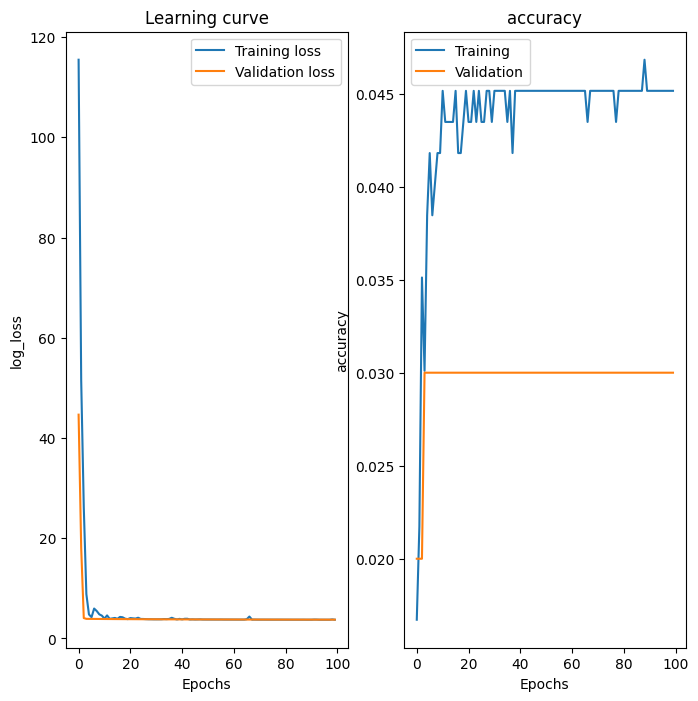

In [ ]:
plot(history2)

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image


img_path = "/content/street_view_images_bucaramanga (3)/street_view_7.128899300474004_-73.11801907514351.jpg"
#capa convolucional
layer_name = "conv2d_657"

img = image.load_img(img_path, target_size=(640, 640))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0
resultado = df[df['Imagen'] == "street_view_7.128847283033897_-73.11283101468092.jpg"]
columns_to_include = ['Cra', 'Cl', 'Número', 'con','Latitud','Longitud']
other_data = resultado[columns_to_include].values.astype(np.float32)

# Combinar imagen y características
combined_data = [img_array, other_data]

# Realizar la predicción
predictions = model2.predict(combined_data)

# Decodificar las predicciones (asumiendo que son probabilidades)
predicted_class = np.argmax(predictions[0])
confidence = predictions[0][predicted_class]
resultado = df[df['Imagen'] == "street_view_7.128899300474004_-73.11801907514351.jpg"]

# Obtener la clase predicha y su confianza
print(f"Clase predicha: {predicted_class}")
print(f"Confianza: {confidence:.4f}")
print(f"Clase verdadera: {resultado['LABEL']}")


1/1 [==============================] - 0s 56ms/step
Clase predicha: 6
Confianza: 0.0376
Clase verdadera: 101    20
Name: LABEL, dtype: int64


In [ ]:
real=resultado["H3_cell"].to_string(index=False)
pred=df[df['LABEL'] == 6]["H3_cell"].iloc[0]
cell_to_map(real, pred) #primeras blue segundas red

### Inception con imageAugmentation y LSTM


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd


#generar nuevas imagenes
datagen = ImageDataGenerator(
    rotation_range=15,
    vertical_flip=True
)

num_new_images = 100
augmented_images = []
augmented_labels = []

for X_batch, y_batch in datagen.flow(train_img, train_y, batch_size=num_new_images, shuffle=False):
    augmented_images.append(X_batch)
    augmented_labels.append(y_batch)
    break

#a npy
augmented_images = np.concatenate(augmented_images)
augmented_labels = np.concatenate(augmented_labels)
augmented_train_img = np.concatenate((train_img, augmented_images))
augmented_train_y = np.concatenate((train_y, augmented_labels))

#dimensiones
print("Dimensiones originales de train_img y train_y:", train_img.shape, train_y.shape)
print("Dimensiones de train_img y train_y después de la aumentación:", augmented_train_img.shape, augmented_train_y.shape)



Dimensiones originales de train_img y train_y: (598, 640, 640, 3) (598,)
Dimensiones de train_img y train_y después de la aumentación: (698, 640, 640, 3) (698,)


In [14]:
#@title usando inceptionv3
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models
from tensorflow.keras.layers import BatchNormalization

inception_v3=InceptionV3(input_shape=(640,640,3), include_top=False, weights='imagenet')


#freezear capas del modelo base (no se actualizan sus pesos), puede tender a overfit
for layer in inception_v3.layers:
    layer.trainable = False

#nuevas capas
#flatten
x = layers.GlobalAveragePooling2D()(inception_v3.output)
x = BatchNormalization()(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.4)(x)
predictions = layers.Dense(51, activation='softmax')(x) #capa softmax para clasificar


model3 = models.Model(inputs=inception_v3.input, outputs=predictions)
model3.summary()

87910968/87910968 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 640, 640, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 319, 319, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 319, 319, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     

In [15]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import pandas as pd

#para que no crashee
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


train_generator = datagen.flow(augmented_train_img, augmented_train_y, batch_size=16)
val_generator = datagen.flow(val_img, val_y, batch_size=16)

optimizer = Adam(learning_rate=0.001)
model3.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=15, min_lr=0.0001)
callbacks = [reduce_lr]


epochs = 70
callbacks = [
    EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True),
    ModelCheckpoint('/content/inception_3.h5', monitor='val_accuracy', save_best_only=True)
]

history = model3.fit(train_generator,
                      epochs=epochs,
                      batch_size=16,
                      validation_data=val_generator,
                      callbacks=callbacks)

loss, accuracy = model3.evaluate(val_img, val_y)
print(f"Loss: {loss}, Accuracy: {accuracy}")

Epoch 1/70
44/44 [==============================] - ETA: 0s - loss: 4.5824 - accuracy: 0.0330

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


44/44 [==============================] - 128s 2s/step - loss: 4.5824 - accuracy: 0.0330 - val_loss: 3.8648 - val_accuracy: 0.0450
Epoch 2/70
44/44 [==============================] - 91s 2s/step - loss: 4.0204 - accuracy: 0.0587 - val_loss: 3.8731 - val_accuracy: 0.0250
Epoch 3/70
44/44 [==============================] - 88s 2s/step - loss: 3.6948 - accuracy: 0.0817 - val_loss: 3.8866 - val_accuracy: 0.0400
Epoch 4/70
44/44 [==============================] - 94s 2s/step - loss: 3.4396 - accuracy: 0.1175 - val_loss: 3.8626 - val_accuracy: 0.0250
Epoch 5/70
44/44 [==============================] - 89s 2s/step - loss: 3.3062 - accuracy: 0.1447 - val_loss: 3.9003 - val_accuracy: 0.0250
Epoch 6/70
44/44 [==============================] - 93s 2s/step - loss: 3.2763 - accuracy: 0.1834 - val_loss: 3.8844 - val_accuracy: 0.0300
Epoch 7/70
44/44 [==============================] - 89s 2s/step - loss: 3.0613 - accuracy: 0.2034 - val_loss: 3.8968 - val_accuracy: 0.0200
Epoch 8/70
44/44 [============

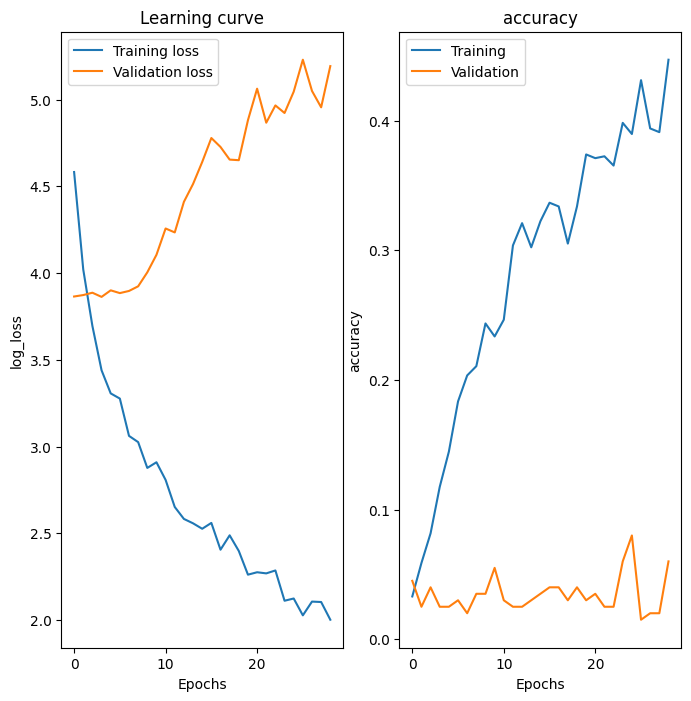

In [20]:
plot(history)

1/1 [==============================] - 3s 3s/step
Clase predicha: 21
Confianza: 0.0763
Clase verdadera: 101    20
Name: LABEL, dtype: int64


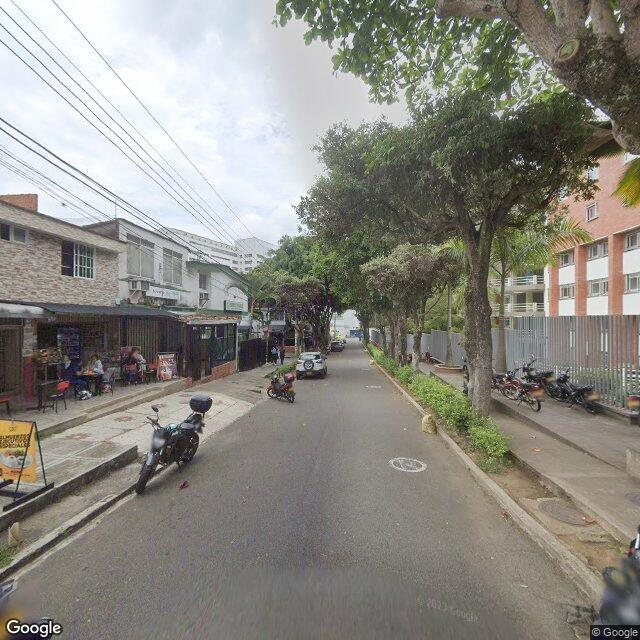

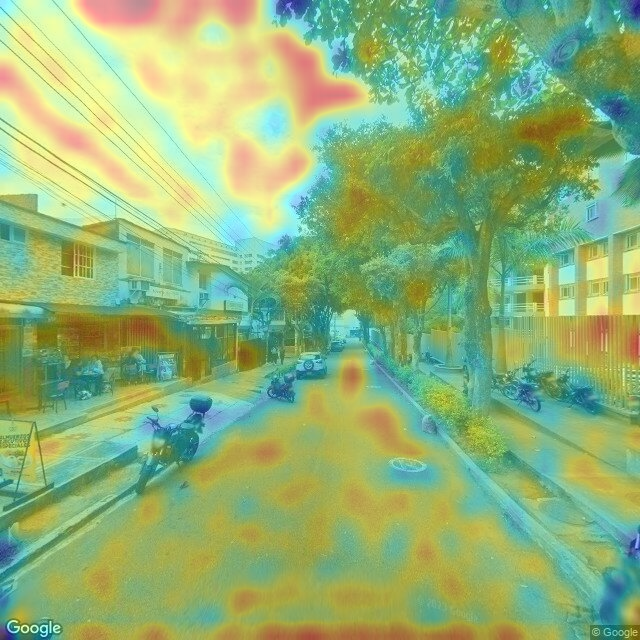

In [10]:
#@title Grad-CAM para evaluar en dónde se fija el modelo
from google.colab.patches import cv2_imshow
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Ruta de la imagen para probar Grad-CAM
img_path = "/content/street_view_images_bucaramanga (3)/street_view_7.128847283033897_-73.11283101468092.jpg"
#capa convolucional
layer_name = "conv2d_25"

# Cargar la imagen y preprocesarla para la entrada del modelo
img = image.load_img(img_path, target_size=(640, 640))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

modelt=load_model("/content/drive/MyDrive/IA2/proyecto/inception_32.h5")
# Realizar la predicción
predictions = modelt.predict(img_array)

# Decodificar las predicciones (asumiendo que son probabilidades)
predicted_class = np.argmax(predictions[0])
confidence = predictions[0][predicted_class]
resultado = df[df['Imagen'] == "street_view_7.128899300474004_-73.11801907514351.jpg"]

# Obtener la clase predicha y su confianza
print(f"Clase predicha: {predicted_class}")
print(f"Confianza: {confidence:.4f}")
print(f"Clase verdadera: {resultado['LABEL']}")

#imagenes og y superpuestas
original_img, gradcam_img = grad_cam(modelt, img_path, layer_name)
cv2_imshow(original_img)
cv2_imshow(gradcam_img)

In [16]:
#@title ubicación en el mapa
real=resultado["H3_cell"].to_string(index=False)
pred=df.loc[df['LABEL'] == 48, 'H3_cell'].to_string(index=False)
cell_to_map(real, pred) #primeras blue segundas red

## EVALUAR MODELOS CON TEST


In [ ]:
#@title plotear celdas reales y predichas
def plot_h3_cells(real_cells, predicted_cells):

    #Convertir celdas a str si no lo son
    real_cells = [str(cell) for cell in real_cells]
    predicted_cells = [str(cell) for cell in predicted_cells]

    coords1 = h3.h3_to_geo_boundary(real_cells[0], geo_json=True)
    centroid_lat = sum(coord[0] for coord in coords1) / len(coords1)
    centroid_lon = sum(coord[1] for coord in coords1) / len(coords1)
    m = folium.Map(location=[centroid_lat, centroid_lon], zoom_start=12)

    #reales en azul
    for cell in real_cells:
        coords = h3.h3_to_geo_boundary(cell, geo_json=True)
        folium.Polygon(locations=coords, color='blue', weight=3, fill=True, fill_color='lightblue', fill_opacity=0.5).add_to(m)

    #predichas en rojo
    for cell in predicted_cells:
        coords = h3.h3_to_geo_boundary(cell, geo_json=True)
        folium.Polygon(locations=coords, color='red', weight=3, fill=True, fill_color='lightcoral', fill_opacity=0.5).add_to(m)

    return m

In [8]:
#@title predicciones en el mapa test respecto a nivel de H3 con model 1
predictions = model_1.predict(test_img)
predicted_classes = np.argmax(predictions, axis=1)


#pasar las labels predicchas a h3_cells
label_to_cell = dict(zip(df['LABEL'], df['H3_cell']))
predicted_celdas = np.array([label_to_cell[label] for label in predicted_classes])

#labels reales a h3
real_celdas = np.array([label_to_cell[label] for label in val_y])
#sale error porq lo corrí sin querer jiji, pero abajó están las clases predichas

NameError: name 'model_1' is not defined

In [ ]:
predicted_classes

array([ 6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6, 28,  6,  6,  6,  6, 28,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6])

In [17]:
#@title predicciones en el mapa test respecto a nivel de H3 con model 2
from tensorflow.keras.models import load_model

predictions = modelt.predict(test_img)
predicted_classes = np.argmax(predictions, axis=1)


#pasar las labels predicchas a h3_cells
label_to_cell = dict(zip(df['LABEL'], df['H3_cell']))
predicted_celdas = np.array([label_to_cell[label] for label in predicted_classes])

#labels reales a h3
real_celdas = np.array([label_to_cell[label] for label in val_y])

7/7 [==============================] - 273s 36s/step


In [30]:
# Convertir numpy.str_ a str
predicted_celdas = predicted_celdas.astype(str)
real_celdas = real_celdas.astype(str)

# Calcular la cantidad de celdas correctas e incorrectas
correctas = np.sum(predicted_celdas == real_celdas)
incorrectas = np.sum(predicted_celdas != real_celdas)
accuracy = correctas / total_celdas


print(f'Celdas correctas: {correctas}')
print(f'Celdas incorrectas: {incorrectas}')
print(f'Accuracy en nivel 10: {accuracy:.2f}')

Celdas correctas: 3
Celdas incorrectas: 197
Accuracy en nivel 10: 0.01


In [38]:
import h3

# Convertir numpy.str_ a str explícitamente
predicted_celdas_str = [str(cell) for cell in predicted_celdas]
real_celdas_str = [str(cell) for cell in real_celdas]

# Transformar celdas H3 de nivel 10 a nivel 9
predicted_celdas_lvl9 = [h3.h3_to_parent(cell, 9) for cell in predicted_celdas_str]
real_celdas_lvl9 = [h3.h3_to_parent(cell, 9) for cell in real_celdas_str]

# Calcular la cantidad de celdas correctas e incorrectas en el nuevo nivel
correctas_lvl9 = np.sum(np.array(predicted_celdas_lvl9) == np.array(real_celdas_lvl9))
incorrectas_lvl9 = np.sum(np.array(predicted_celdas_lvl9) != np.array(real_celdas_lvl9))

print(f'Celdas correctas en nivel 9: {correctas_lvl9}')
print(f'Celdas incorrectas en nivel 9: {incorrectas_lvl9}')

# Calcular la precisión (accuracy)
total_celdas = len(predicted_celdas_lvl9)
accuracy_lvl9 = correctas_lvl9 / total_celdas

print(f'Accuracy en nivel 9: {accuracy_lvl9:.2f}')

Celdas correctas en nivel 9: 36
Celdas incorrectas en nivel 9: 164
Accuracy en nivel 9: 0.18


In [32]:

predicted_celdas_str = [str(cell) for cell in predicted_celdas]
real_celdas_str = [str(cell) for cell in real_celdas]

predicted_celdas_lvl8 = [h3.h3_to_parent(cell, 8) for cell in predicted_celdas_str]
real_celdas_lvl8 = [h3.h3_to_parent(cell, 8) for cell in real_celdas_str]

correctas_lvl8 = np.sum(np.array(predicted_celdas_lvl8) == np.array(real_celdas_lvl8))
incorrectas_lvl8 = np.sum(np.array(predicted_celdas_lvl8) != np.array(real_celdas_lvl8))

print(f'Celdas correctas en nivel 8: {correctas_lvl8}')
print(f'Celdas incorrectas en nivel 9: {incorrectas_lvl8}')

# Calcular la precisión (accuracy)
total_celdas = len(predicted_celdas_lvl8)
accuracy_lvl8 = correctas_lvl8 / total_celdas

print(f'Accuracy en nivel 8: {accuracy_lvl8:.2f}')

Celdas correctas en nivel 8: 56
Celdas incorrectas en nivel 9: 144
Accuracy en nivel 8: 0.28
